# Data Pre_processing


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve,
    average_precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)
from pathlib import Path
from joblib import dump
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("../data/bank-full.csv", sep=";", quotechar='"', engine="python")

### Data Exploration

In [3]:
print(f"Dataset shape: {df.shape}")
df.info()
df.describe(include='all')

Dataset shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [4]:
print("\nMissing values:")
print(df.isnull().sum())

print("\nY rate:")
print(df['y'].value_counts(normalize=True))

print("\nStatistical summary:")
print(df.describe())


Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Y rate:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Statistical summary:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.0

Xử lý Duration

In [5]:
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

### Features and label split

In [6]:
X = df.drop(columns=['y'], axis=1)
Y = df['y']

In [7]:
Y = Y.map({'yes': 1, 'no': 0})
print(f"Features shape: {X.shape}")
print(f"Labels shape: {Y.shape}")

Features shape: (45211, 15)
Labels shape: (45211,)


### Split Train and Test sets

In [8]:
ration = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ration, random_state=42, stratify=Y)
print(f"Training set shape: {X_train.shape}, {Y_train.shape}")

Training set shape: (36168, 15), (36168,)


### Encoding the categorical features

In [9]:
def encode_categories(X_train, X_test):
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    for X in (X_train_encoded, X_test_encoded):
        X["pdays_is_999"] = (X["pdays"] == 999).astype(int)
    # Binary encoding for default, housing, loan
    cots = ["default", "housing", "loan"]
    encode = LabelEncoder()
    for cot in cots: 
        X_train_encoded[cot] = encode.fit_transform(X_train_encoded[cot])
        X_test_encoded[cot] = encode.transform(X_test_encoded[cot])
    #Liệt kê các cột category (nominal) để One-Hot
    cat_cols = ["job", "marital", "education", "contact", "month", "poutcome"]
    encoders = {}
    encoded_train_dfs = []
    encoded_test_dfs = []

    for col in cat_cols:
        ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
        tr_enc = ohe.fit_transform(X_train_encoded[[col]])
        te_enc = ohe.transform(X_test_encoded[[col]])

        feat_names = ohe.get_feature_names_out([col])

        tr_df = pd.DataFrame(tr_enc, columns=feat_names, index=X_train_encoded.index)
        te_df = pd.DataFrame(te_enc, columns=feat_names, index=X_test_encoded.index)

        encoded_train_dfs.append(tr_df)
        encoded_test_dfs.append(te_df)

        encoders[col] = ohe  

    
    X_train_encoded = X_train_encoded.drop(columns=cat_cols)
    X_test_encoded = X_test_encoded.drop(columns=cat_cols)

    if encoded_train_dfs:
        X_train_encoded = pd.concat([X_train_encoded] + encoded_train_dfs, axis=1)
        X_test_encoded = pd.concat([X_test_encoded] + encoded_test_dfs, axis=1)

    return X_train_encoded, X_test_encoded

In [10]:
X_train_enc, X_test_enc = encode_categories(X_train, X_test)
print(f"Features after encoding: {list(X_train_enc.columns)}")
print(f"Training set shape after encoding: {X_train_enc.shape}")

Features after encoding: ['age', 'default', 'balance', 'housing', 'loan', 'day', 'campaign', 'pdays', 'previous', 'pdays_is_999', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
Training set shape after encoding: (36168, 42)


### Features Scaling 

In [11]:
def feature_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )
    return X_train_scaled, X_test_scaled, scaler

In [12]:
X_train_final, X_test_final, scaler = feature_scaling(X_train_enc, X_test_enc)
print(f"Final training set shape: {X_train_final.shape}")
print(f"Final test set shape: {X_test_final.shape}")

Final training set shape: (36168, 42)
Final test set shape: (9043, 42)


### Summary 


In [13]:
print(f"\nSample of final preprocessed training data:")
print(X_train_final.head())

print(f"\nCorresponding labels:")
print(Y_train.head().tolist())


Sample of final preprocessed training data:
            age   default   balance   housing      loan       day  campaign  \
24001 -0.460434 -0.134961 -0.164410 -1.123601 -0.437608  1.582124 -0.246104   
43409 -1.589641 -0.134961  0.899627 -1.123601 -0.437608 -1.298384  0.398202   
20669  0.292371 -0.134961 -0.365486  0.889995 -0.437608 -0.458236  0.398202   
18810  0.668773 -0.134961 -0.445003 -1.123601 -0.437608  1.822166  2.653271   
23130 -0.272233 -0.134961 -0.361249 -1.123601 -0.437608  1.222060  2.331118   

          pdays  previous  pdays_is_999  ...  month_jul  month_jun  month_mar  \
24001 -0.410910 -0.241509           0.0  ...  -0.425164   -0.36427  -0.104541   
43409  1.446096  2.664584           0.0  ...  -0.425164   -0.36427  -0.104541   
20669 -0.410910 -0.241509           0.0  ...  -0.425164   -0.36427  -0.104541   
18810 -0.410910 -0.241509           0.0  ...   2.352033   -0.36427  -0.104541   
23130 -0.410910 -0.241509           0.0  ...  -0.425164   -0.36427  -0.1045

# Random Forest

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_final, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train_final, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test_final, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.895


Cắt tỉa độ sâu của cây và kiểm tra độ chính xác

In [16]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train_final, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train_final, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test_final, Y_test)))

Accuracy on training set: 0.883
Accuracy on test set: 0.883


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, class_weight='balanced') 

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, None],       
    'min_samples_leaf': [1, 2, 4]      
}

grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='f1')

grid_search.fit(X_train_final, Y_train)


best_rf = grid_search.best_estimator_
#print(f"Siêu tham số tốt nhất: {grid_search.best_params_}")

Y_pred_final = best_rf.predict(X_test_final)
final_accuracy = accuracy_score(Y_test, Y_pred_final)

print(f"Độ chính xác cuối cùng trên tập test: {final_accuracy * 100:.2f}%")



Độ chính xác cuối cùng trên tập test: 86.48%


In [18]:
Y_pred_final.shape

(9043,)

In [19]:
score_rf = round(accuracy_score(Y_pred_final, Y_test) * 100, 2)
print("The accurracy score achieved using Decision Tree is: "+str(score_rf) +"%" )

The accurracy score achieved using Decision Tree is: 86.48%


### ROC diagrams and Top Features of Random Forests


Thông số Random Forest
Test ROC-AUC (RF): 0.8013
Test PR-AUC (RF): 0.4513

Top 5 Đặc trưng (RF):
balance            0.1272
age                0.1149
day                0.1008
poutcome_success   0.0732
contact_unknown    0.0699
dtype: float64


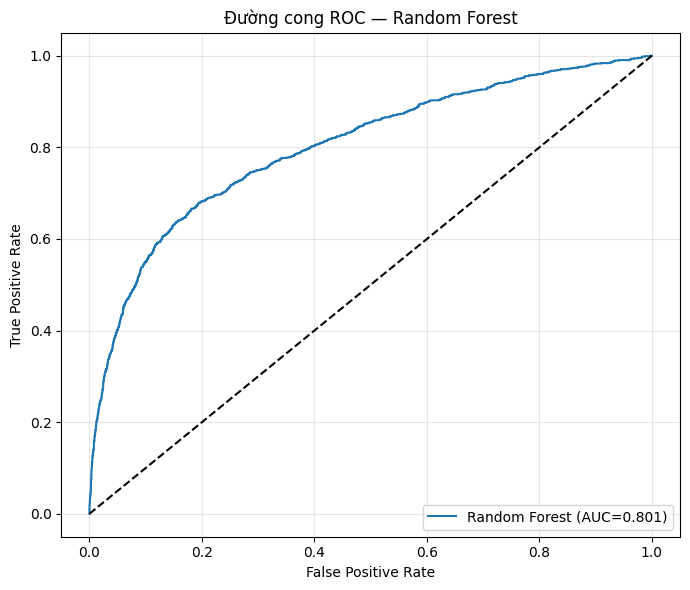

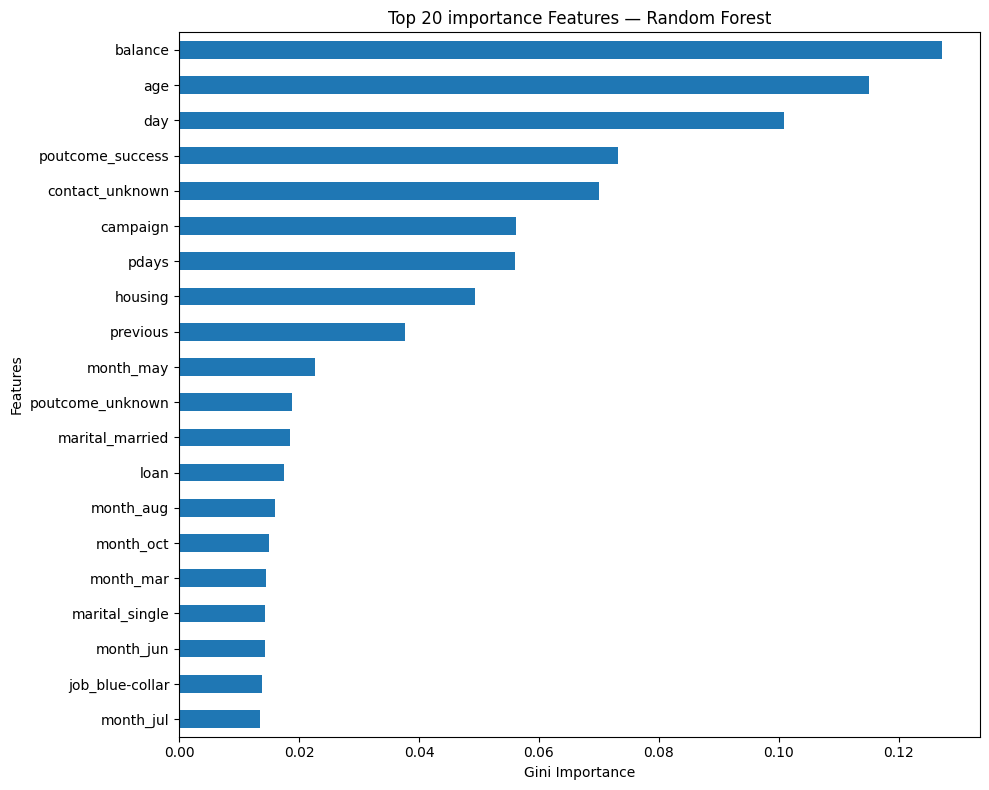

In [45]:
y_proba_rf = best_rf.predict_proba(X_test_final)[:, 1]

roc_auc_rf = roc_auc_score(Y_test, y_proba_rf)
pr_auc_rf  = average_precision_score(Y_test, y_proba_rf)
print(f"Thông số Random Forest")
print(f"Test ROC-AUC (RF): {roc_auc_rf:.4f}")
print(f"Test PR-AUC (RF): {pr_auc_rf:.4f}")

fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_proba_rf)
plt.figure(figsize=(7, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color='k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Đường cong ROC — Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('rf_roc_curve.png')

importances = best_rf.feature_importances_

if hasattr(X_train_final, 'columns'):
        feature_names = list(X_train_final.columns)
else:
    feature_names = [f'f_{i}' for i in range(X_train_final.shape[1])]

feat_imp_series = pd.Series(importances, index=feature_names)
top_20_features = feat_imp_series.nlargest(20)

plt.figure(figsize=(10, 8))
top_20_features.sort_values().plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Top 20 importance Features — Random Forest")
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
print("\nTop 5 Đặc trưng (RF):")
print(top_20_features.nlargest(5))

# Confusion matrix of Random Forest

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
matrix = confusion_matrix(Y_test, Y_pred_final)

<Axes: >

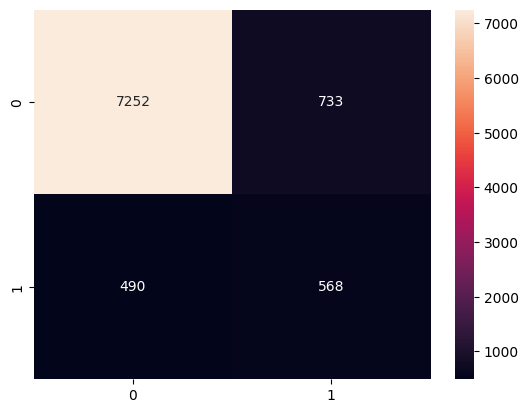

In [22]:
sns.heatmap(matrix, annot = True, fmt = "d")

# Precision score


In [23]:
from sklearn.metrics import precision_score

In [24]:
precision = precision_score(Y_test, Y_pred_final)

In [25]:
print("Precision: ", precision)

Precision:  0.43658724058416604


# Recall


In [26]:
from sklearn.metrics import recall_score

In [27]:
recall = recall_score(Y_test, Y_pred_final)

In [28]:
print("Recall: ", recall)

Recall:  0.5368620037807184


# F-score

In [29]:
print((2*precision*recall)/(precision+recall))

0.4815599830436626


cm using bad style


In [30]:
CM = pd.crosstab(Y_test,Y_pred_final)
CM

col_0,0,1
y,,
0,7252,733
1,490,568


In [31]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

# False negative rate of the model

In [32]:
fnr=FN*100/(FN+TP)
print(fnr)

46.31379962192817


# Decision Tree

### Định nghĩa mô hình & lưới tham số, GridSearchCV

In [33]:
RANDOM_STATE = 42

# Kiểm tra biến đã có sẵn từ phần RandomForest
for _name in ["X_train_final", "Y_train", "X_test_final", "Y_test"]:
    if _name not in globals():
        raise RuntimeError(f"Thiếu biến {_name}. Hãy chạy các cell tiền xử lý trước đó.")

dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight="balanced"  # dữ liệu mất cân bằng
)

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 6, 8, 10, 12, 15],
    "min_samples_split": [2, 10, 20, 50],
    "min_samples_leaf": [1, 5, 10, 20],
    "max_features": [None, "sqrt", "log2"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    verbose=1,
    refit=True
)

dt_grid.fit(X_train_final, Y_train)

best_dt = dt_grid.best_estimator_
print("Best ROC-AUC (CV):", dt_grid.best_score_)
print("Best params:")
print(dt_grid.best_params_)

# Lưu model tương tự cách bạn lưu RF
from pathlib import Path
Path("../models").mkdir(exist_ok=True)
dump(best_dt, "../models/decision_tree.joblib")


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best ROC-AUC (CV): 0.7686474398373148
Best params:
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 50}


['../models/decision_tree.joblib']

### Bảng kết quả CV top

In [34]:
cv_results = pd.DataFrame(dt_grid.cv_results_)
cols_show = [
    "mean_test_score", "mean_fit_time",
    "param_criterion", "param_max_depth",
    "param_min_samples_split", "param_min_samples_leaf", "param_max_features"
]
cv_results[cols_show].sort_values("mean_test_score", ascending=False).head(10)


,mean_test_score,mean_fit_time,param_criterion,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features
159,0.768647,0.440735,gini,10,50,20,None
157,0.768467,0.436239,gini,10,10,20,None
158,0.768467,0.429003,gini,10,20,20,None
156,0.768467,0.426806,gini,10,2,20,None
155,0.767012,0.439880,gini,10,50,10,None
495,0.766119,0.562651,entropy,12,50,20,None
783,0.766119,0.533827,log_loss,12,50,20,None
206,0.765786,0.522094,gini,12,20,20,None
204,0.765786,0.539556,gini,12,2,20,None
205,0.765786,0.521976,gini,12,10,20,None


### Đánh giá test và in chỉ số

Test ROC-AUC: 0.7793
Test PR-AUC : 0.4169


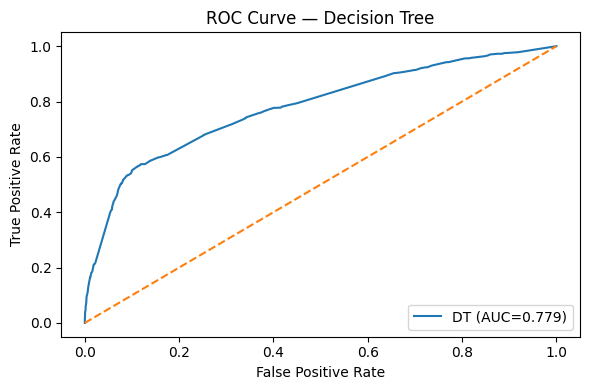

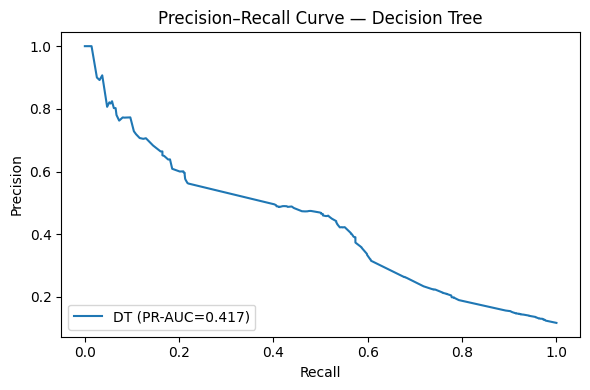

<Figure size 500x400 with 0 Axes>

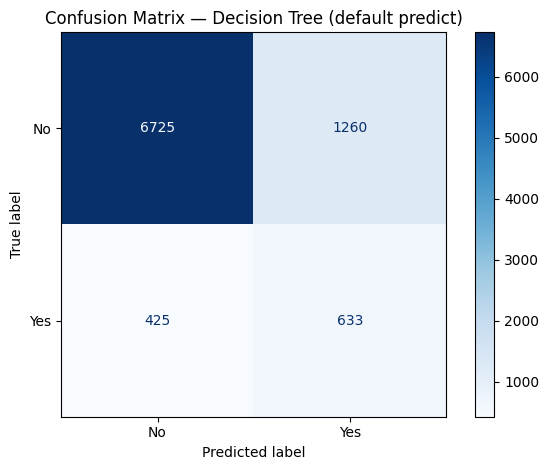

=== Classification Report (default predict) ===
              precision    recall  f1-score   support

           0     0.9406    0.8422    0.8887      7985
           1     0.3344    0.5983    0.4290      1058

    accuracy                         0.8137      9043
   macro avg     0.6375    0.7203    0.6588      9043
weighted avg     0.8696    0.8137    0.8349      9043



In [35]:
# Xác suất lớp 1 và nhãn dự đoán mặc định
y_proba = best_dt.predict_proba(X_test_final)[:, 1]
y_pred  = best_dt.predict(X_test_final)

# --- ROC-AUC & PR-AUC ---
roc_auc = roc_auc_score(Y_test, y_proba)
pr_auc  = average_precision_score(Y_test, y_proba)
print(f"Test ROC-AUC: {roc_auc:.4f}")
print(f"Test PR-AUC : {pr_auc:.4f}")

# --- Plot ROC ---
fpr, tpr, _ = roc_curve(Y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"DT (AUC={roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Decision Tree")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# --- Plot Precision–Recall ---
prec, rec, _ = precision_recall_curve(Y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"DT (PR-AUC={pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Decision Tree")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

# --- Confusion Matrix & Report (mặc định predict) ---
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
plt.figure(figsize=(5,4))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix — Decision Tree (default predict)")
plt.grid(False)
plt.tight_layout()
plt.show()

print("=== Classification Report (default predict) ===")
print(classification_report(Y_test, y_pred, digits=4))

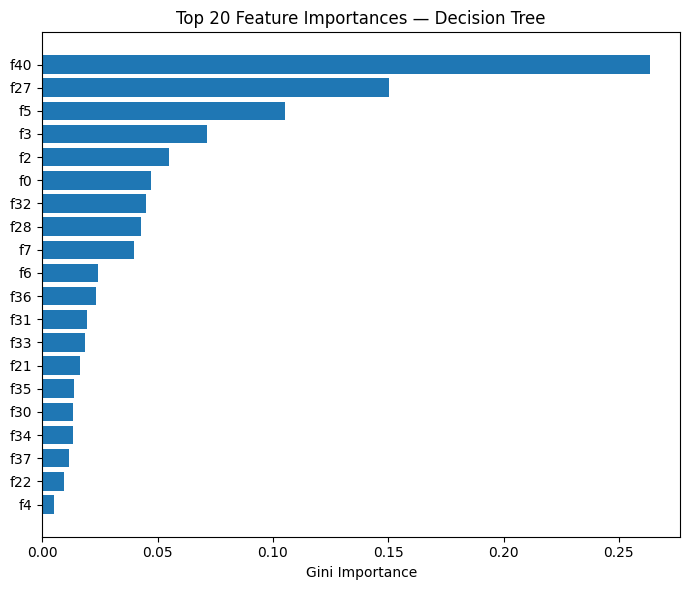

In [36]:
# ===== Feature importances (nếu có tên cột sau OHE) =====
importances = getattr(best_dt, "feature_importances_", None)

if importances is not None:
    k = 20  # số đặc trưng top
    if "feature_names_final" in globals() and feature_names_final is not None:
        names = np.array(feature_names_final)
    else:
        names = np.array([f"f{i}" for i in range(importances.shape[0])])

    order = np.argsort(importances)[::-1][:k]
    top_names = names[order]
    top_vals  = importances[order]

    plt.figure(figsize=(7, 6))
    y_pos = np.arange(len(top_names))
    plt.barh(y_pos, top_vals)
    plt.yticks(y_pos, top_names)
    plt.gca().invert_yaxis()
    plt.xlabel("Gini Importance")
    plt.title(f"Top {k} Feature Importances — Decision Tree")
    plt.tight_layout()
    plt.show()
else:
    print("Model không có thuộc tính feature_importances_.")


In [37]:
# ===== Save model =====
Path("../models").mkdir(exist_ok=True)
model_path = "../models/decision_tree.joblib"
dump(best_dt, model_path)
print(f"Đã lưu Decision Tree model vào: {model_path}")


Đã lưu Decision Tree model vào: ../models/decision_tree.joblib


### Cấu trúc dạng cây

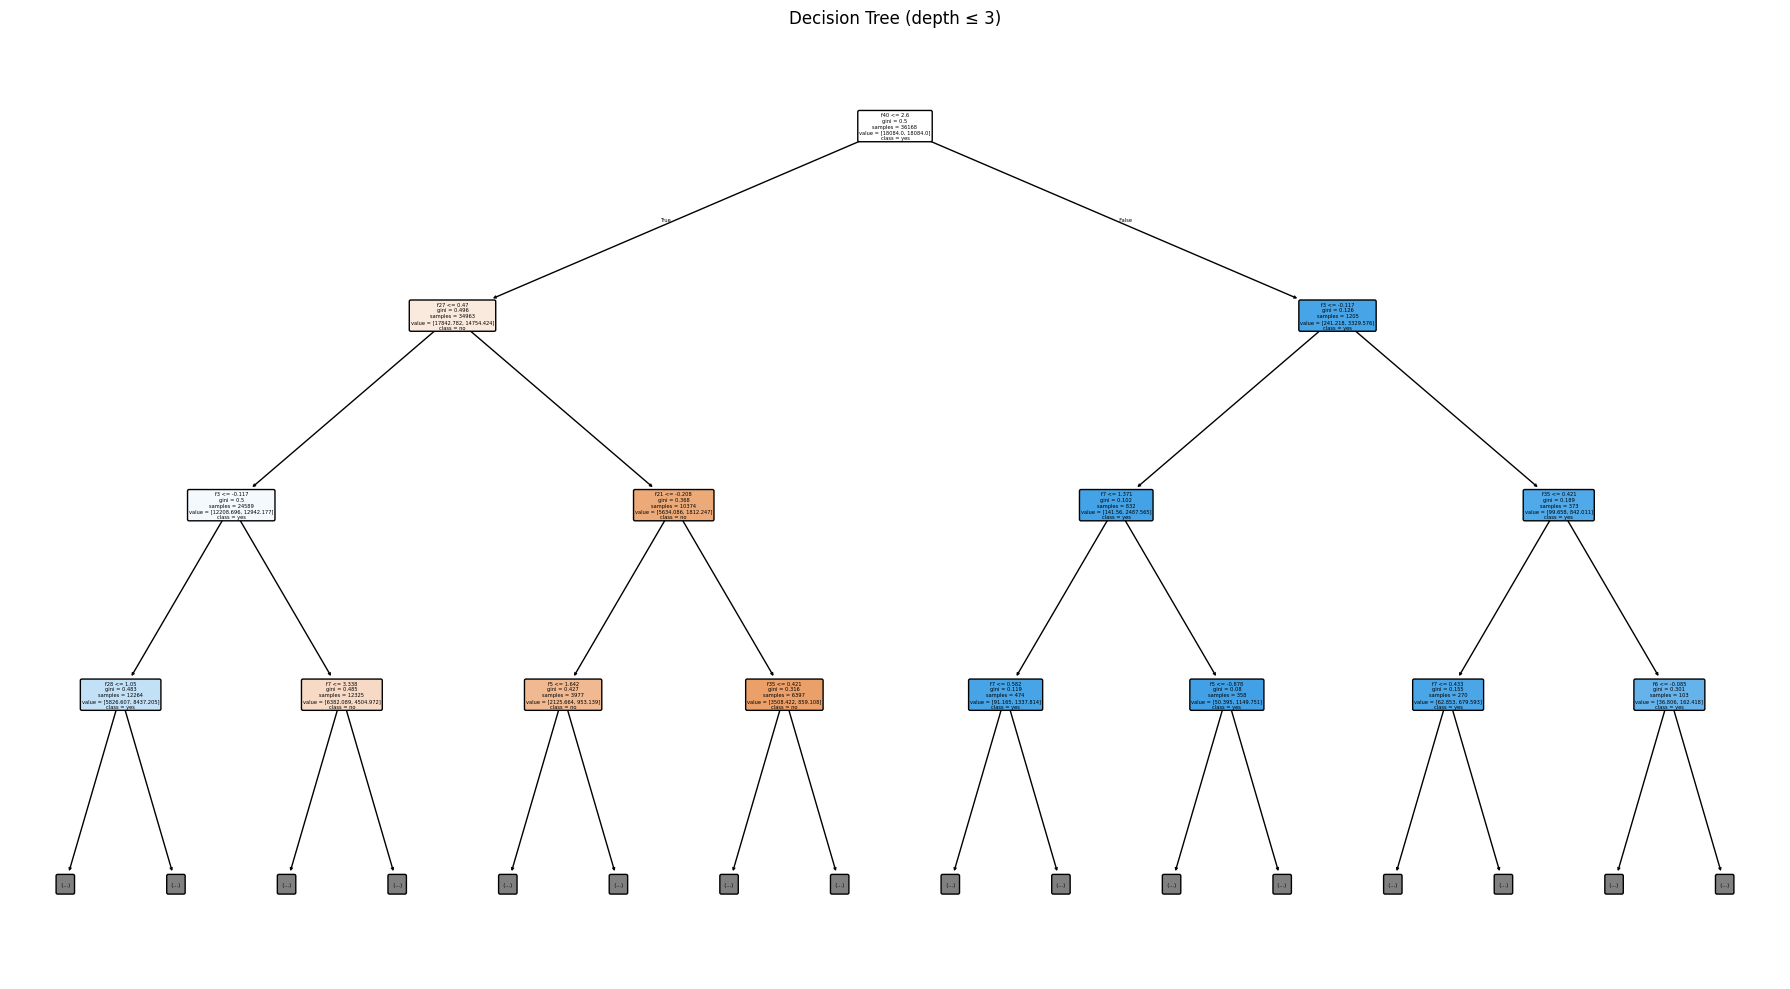

In [38]:
if "feature_names_final" in globals() and feature_names_final is not None:
    _feat_names = feature_names_final
else:
    # fallback tên f0, f1, ...
    _feat_names = [f"f{i}" for i in range(best_dt.n_features_in_)]

# Vẽ cây rút gọn (ví dụ: 3 tầng)
max_show_depth = 3

plt.figure(figsize=(18, 10))
plot_tree(
    best_dt,
    max_depth=max_show_depth,
    feature_names=_feat_names,
    class_names=["no", "yes"],
    filled=True,
    rounded=True,
    impurity=True
)
plt.title(f"Decision Tree (depth ≤ {max_show_depth})")
plt.tight_layout()


In [39]:
# ========= Cell: Imports & Helpers =========
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix
)

# Hiển thị đẹp hơn
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

def smart_load_array(possible_names, loaders=('npy','pkl','csv')):
    """
    Cố gắng load một mảng theo nhiều tên & định dạng khác nhau.
    Trả về None nếu không tìm thấy.
    """
    for name in possible_names:
        base = name.replace('.npy','').replace('.pkl','').replace('.csv','')
        for ext in loaders:
            path = f'./{base}.{ext}'
            if os.path.exists(path):
                try:
                    if ext == 'npy':
                        return np.load(path, allow_pickle=True)
                    elif ext == 'pkl':
                        return joblib.load(path)
                    elif ext == 'csv':
                        arr = pd.read_csv(path)
                        # Thử suy đoán cột duy nhất chứa dữ liệu
                        if arr.shape[1] == 1:
                            return arr.iloc[:,0].values
                        # Nếu có cột 'value' hoặc 'y'
                        for col in ['value','y','pred','proba']:
                            if col in arr.columns:
                                return arr[col].values
                        # fallback: cột cuối
                        return arr.iloc[:,-1].values
                except Exception as e:
                    print(f'⚠️ Không thể load {path}: {e}')
    return None

def to_1d_np(x):
    """Đưa về np.ndarray 1D nếu là Series/DataFrame/ndarray 2D có 1 cột."""
    if x is None:
        return None
    if isinstance(x, pd.Series):
        return x.values
    if isinstance(x, pd.DataFrame):
        if x.shape[1] == 1:
            return x.iloc[:,0].values
        raise ValueError("DataFrame có >1 cột, không biết cột nào là nhãn.")
    x = np.asarray(x)
    if x.ndim == 2 and x.shape[1] == 1:
        return x.ravel()
    return x


## 📦 Thu thập dự đoán của 2 mô hình (DT, RF)

**Mục tiêu:** Gom đủ **pred** và **proba** để tính metrics & vẽ ROC cho cả 2 mô hình.

**Nguồn/Chuẩn hóa:**
- **Decision Tree (Người A):**
  - `y_pred_dt = y_pred` (đã lưu ở cell 38)
  - `y_proba_dt = y_proba` (đã lưu ở cell 38)
- **Random Forest (Người B):**
  - `y_pred_rf = Y_pred_final` (cell 19)
  - **Bổ sung:** `y_proba_rf = best_rf.predict_proba(X_test_final)[:, 1]`

**Lưu ý an toàn:**
- Nếu biến không còn trong RAM, có thể **load từ file** (`*.npy`, `*.pkl`, …).
- Thiếu `best_rf` → cần chạy lại cell của Người B hoặc nạp `best_rf.pkl`.
- Nhãn `Y_train`, `Y_test` nên là **0/1** (nếu là `'yes'/'no'`, cần map trước trong tiền xử lý).


In [40]:
# ========= Cell: Train Logistic Regression with GridSearchCV =========
# Kỳ vọng các biến này đã có từ cell 1-15 trong notebook gốc:
# X_train_final, Y_train, X_test_final, Y_test

import numpy as np
X_train_np = np.asarray(X_train_final)
X_test_np  = np.asarray(X_test_final)
Y_train_np = to_1d_np(Y_train)
Y_test_np  = to_1d_np(Y_test)



## 📊 Bảng so sánh Metrics tổng hợp

**Mục tiêu:** So sánh **định lượng** hiệu năng 3 mô hình trên tập test.

**Thiết lập:**
- Ground truth: `Y_test`.
- Hàng (index): `Decision Tree`, `Random Forest`.
- Cột (metrics):
  - **Accuracy** — tỉ lệ dự đoán đúng tổng thể (tham khảo; dễ “lạc quan” khi lệch lớp).
  - **Precision (class 1)** — trong các dự đoán “yes”, bao nhiêu là đúng “yes”.
  - **Recall (class 1)** — trong các mẫu “yes” thật, bắt đúng được bao nhiêu.
  - **F1-score (class 1)** — hài hòa Precision & Recall cho lớp 1.
  - **ROC-AUC** — khả năng phân tách 2 lớp dựa vào xác suất (cao hơn thường tốt hơn).

**Cách đọc nhanh:**
- Ưu tiên **F1 (class 1)** & **ROC-AUC** khi dữ liệu lệch lớp.
- Nếu **sợ bỏ sót khách “yes”** → quan tâm **Recall (class 1)**.  
- Nếu **sợ gọi nhầm khách “no”** → quan tâm **Precision (class 1)**.

**Đầu ra:**
- `df_metrics` hiển thị trong notebook.  
- Lưu file `comparison_metrics.csv` để dùng trong báo cáo.


In [41]:
# ========= Cell: Collect DT/RF outputs & Build metrics table =========
# 1) Decision Tree — lấy từ biến có sẵn hoặc file đã lưu
try:
    # Thử lấy ngay từ biến notebook (nếu còn trong bộ nhớ)
    y_pred_dt = to_1d_np(y_pred)        # Người A lưu trong biến y_pred
    y_proba_dt = to_1d_np(y_proba)      # Người A lưu trong biến y_proba
except NameError:
    # Nếu biến không tồn tại, cố gắng load từ file
    y_pred_dt  = smart_load_array(['y_pred', 'y_pred_dt'])
    y_proba_dt = smart_load_array(['y_proba', 'y_proba_dt'])

# 2) Random Forest — lấy y_pred_rf và bổ sung y_proba_rf từ best_rf
try:
    y_pred_rf = to_1d_np(Y_pred_final)  # Người B lưu trong Y_pred_final
except NameError:
    y_pred_rf = smart_load_array(['Y_pred_final', 'y_pred_rf', 'y_rf_pred'])
    
# Cần y_proba_rf từ best_rf
try:
    # best_rf kỳ vọng tồn tại từ cell 19 (người B)
    y_proba_rf = best_rf.predict_proba(X_test_np)[:, 1]
except NameError:
    # Nếu không còn biến best_rf, thử tải từ file nếu có
    candidate_models = ['best_rf.pkl', 'rf_best.pkl', 'rf_model.pkl']
    y_proba_rf = None
    for path in candidate_models:
        if os.path.exists(path):
            try:
                _rf = joblib.load(path)
                y_proba_rf = _rf.predict_proba(X_test_np)[:, 1]
                print(f'Loaded RF model from {path}')
                break
            except Exception as e:
                print(f'⚠️ Không thể dùng {path}: {e}')
    if y_proba_rf is None:
        raise RuntimeError("Không tìm được/bổ sung được y_proba_rf vì thiếu best_rf. Hãy đảm bảo biến best_rf còn trong kernel hoặc có file .pkl.")

# 3) Kiểm tra đủ dữ liệu DT/RF
if y_pred_dt is None or y_proba_dt is None:
    raise RuntimeError("Thiếu dự đoán/xc suất của Decision Tree (y_pred_dt / y_proba_dt). Hãy đảm bảo y_pred, y_proba đã được lưu & có thể nạp lại.")
if y_pred_rf is None or y_proba_rf is None:
    raise RuntimeError("Thiếu dự đoán/xác suất của Random Forest (y_pred_rf / y_proba_rf).")

# 4) Tính metrics cho 3 mô hình
def compute_metrics(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (class 1)': precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        'Recall (class 1)': recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        'F1-score (class 1)': f1_score(y_true, y_pred, pos_label=1, zero_division=0),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }

metrics_dt = compute_metrics(Y_test_np, y_pred_dt,  y_proba_dt)
metrics_rf = compute_metrics(Y_test_np, y_pred_rf,  y_proba_rf)

df_metrics = pd.DataFrame.from_dict(
    {
        'Decision Tree':       metrics_dt,
        'Random Forest':       metrics_rf
    },
    orient='index'
)

display(df_metrics)
df_metrics.to_csv('comparison_metrics.csv', index=True)
print("✅ Đã lưu bảng metrics tại: comparison_metrics.csv")


c:\Users\ACER\Downloads\python\data-mining-assignment\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Accuracy,Precision (class 1),Recall (class 1),F1-score (class 1),ROC-AUC
Decision Tree,0.8137,0.3344,0.5983,0.4290,0.7793
Random Forest,0.8648,0.4366,0.5369,0.4816,0.8013


✅ Đã lưu bảng metrics tại: comparison_metrics.csv


## 📈 Biểu đồ: ROC chung & 2 Confusion Matrix

**Mục tiêu trực quan hóa:**
1) **ROC (1 hình cho 2 đường):**
   - Vẽ ROC của **DT / RF / LR** bằng `y_proba_*`.
   - Hiển thị **AUC** trong `legend`.
   - Đường ROC **càng gần góc trái-trên** càng tốt; **AUC** càng cao càng mạnh.
2) **Confusion Matrix (2 hình):**
   - Một ma trận nhầm lẫn cho mỗi mô hình (DT, RF, LR) dùng `y_pred_*`.
   - Đọc nhanh:
     - **FN (thực 1 dự đoán 0)** → bỏ sót khách “yes” (ảnh hưởng Recall).  
     - **FP (thực 0 dự đoán 1)** → gọi nhầm khách “no” (ảnh hưởng Precision).

**Đầu ra:**
- `roc_comparison.png` — ROC 2 mô hình.  
- `confusion_matrices.png` — 2 subplot (DT/RF) cạnh nhau.


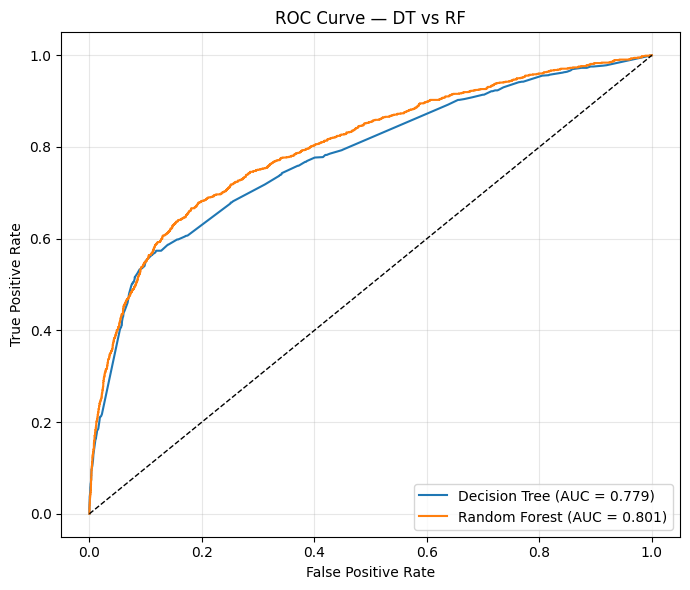

✅ Đã lưu ROC plot: roc_comparison.png


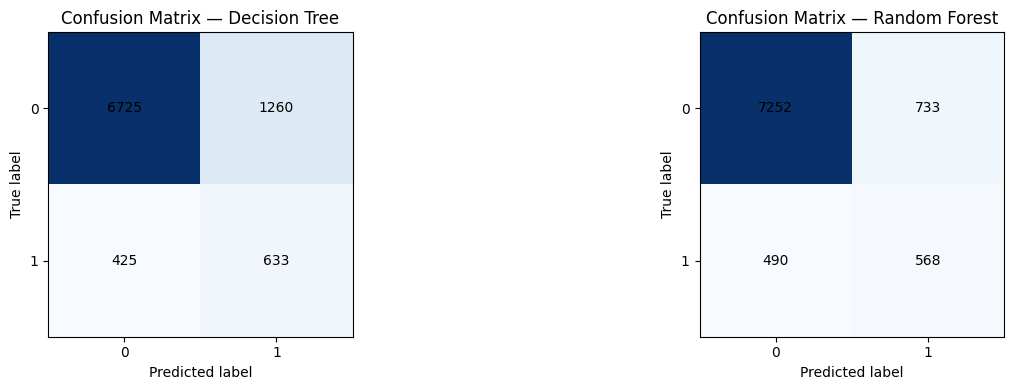

✅ Đã lưu Confusion Matrices: confusion_matrices.png


In [42]:
# ========= Cell: Plots (ROC + Confusion Matrices) =========
plt.figure(figsize=(7,6))

# ROC cho 2 mô hình
fpr_dt, tpr_dt, _ = roc_curve(Y_test_np, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(Y_test_np, y_proba_rf)

auc_dt = roc_auc_score(Y_test_np, y_proba_dt)
auc_rf = roc_auc_score(Y_test_np, y_proba_rf)


plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0,1], [0,1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — DT vs RF')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_comparison.png', dpi=150)
plt.show()
print("✅ Đã lưu ROC plot: roc_comparison.png")

# Confusion matrices (subplot 1x2)
from itertools import product

fig, axes = plt.subplots(1, 2, figsize=(15,4))

def plot_cm(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(['0','1']); ax.set_yticklabels(['0','1'])
    ax.set_xlabel('Predicted label'); ax.set_ylabel('True label')
    # Annotate
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=10)

plot_cm(axes[0], Y_test_np, y_pred_dt, 'Confusion Matrix — Decision Tree')
plot_cm(axes[1], Y_test_np, y_pred_rf, 'Confusion Matrix — Random Forest')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=150)
plt.show()
print("✅ Đã lưu Confusion Matrices: confusion_matrices.png")
